<a href="https://colab.research.google.com/github/reshma-03/IISc-Projects/blob/main/M6_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
# YOUR CODE HERE
images_paths = glob.glob("/content/FullIJCNN2013/*/*.ppm")

In [ ]:
len(images_paths)

1213

In [ ]:
features, labels = [], []
for path in images_paths:
  image = Image.open(path)
  resized_image = image.resize((30,30))
  image_array = np.array(resized_image)
  image_array_1D = image_array.flatten()
  features.append(image_array_1D)
  labels.append(int(path.split("/")[3]))

In [ ]:
class_names = np.unique(labels)
print(class_names) # 43 different classes

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
print(features[0].shape) # shape of 1 image. 30*30*3(r,g,b) = 2700 features

(2700,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

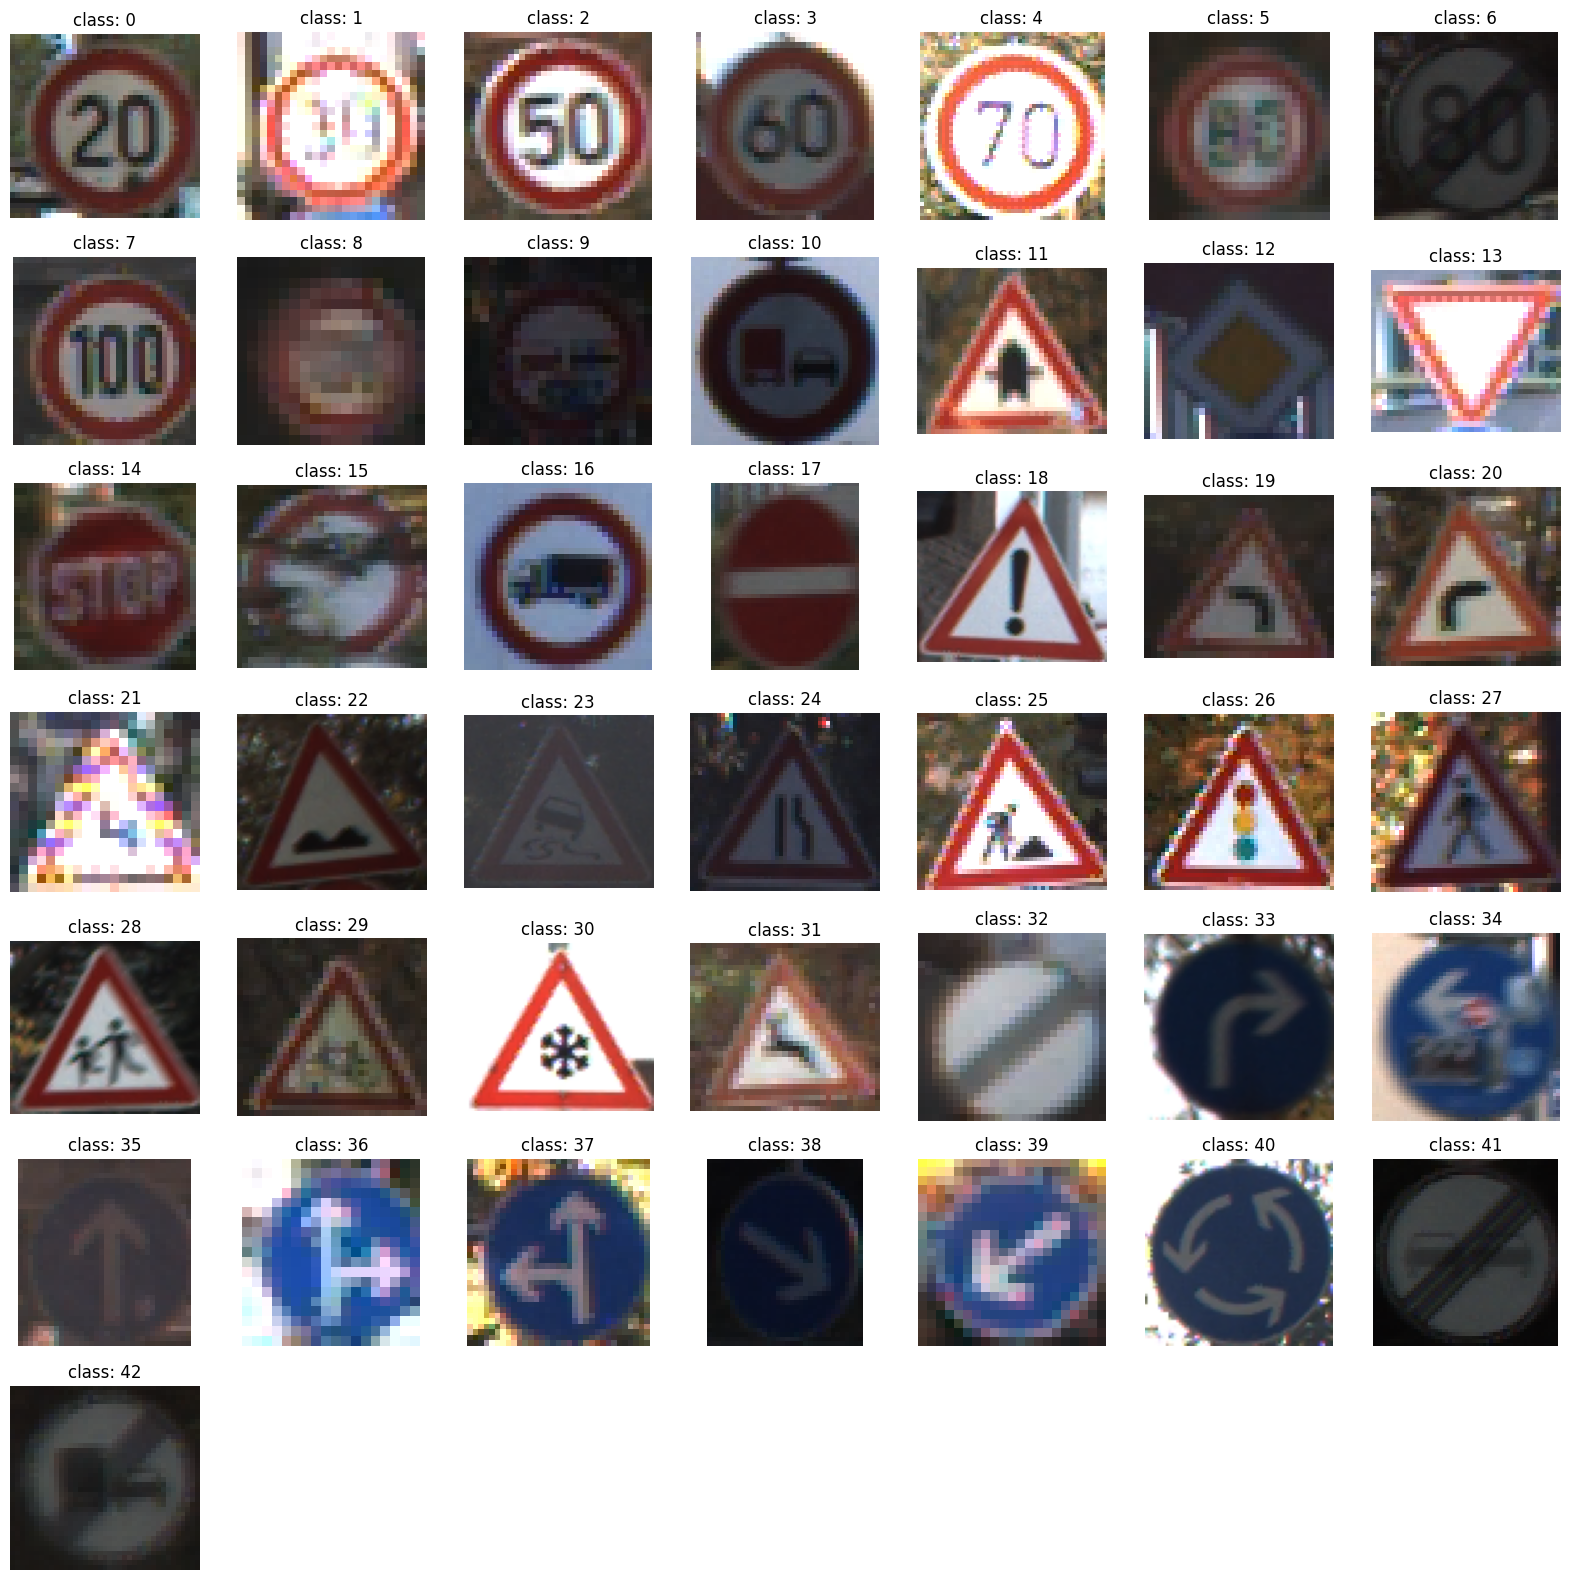

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(20, 20))
for i in range(len(class_names)):
  index = labels.index(i)
  plt.subplot(7, 7, i+1)
  plt.axis('off')
  plt.title('class: {}'.format(i))
  plt.imshow(imread(images_paths[index]))

#### Plot the distribution of Classes

Text(0, 0.5, 'Count')

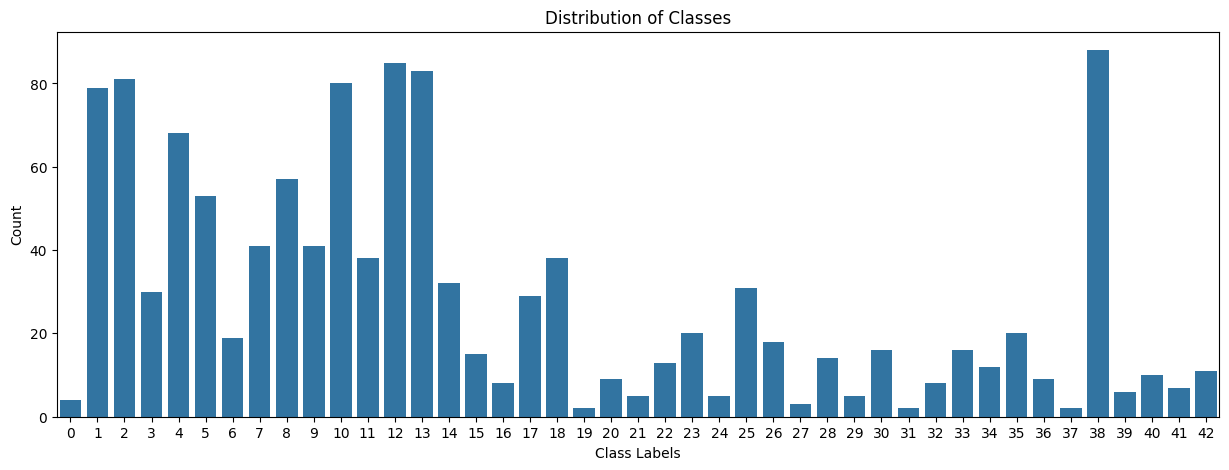

In [ ]:
# YOUR CODE HERE
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.countplot(x=np.array(labels))
plt.title('Distribution of Classes')
plt.xlabel('Class Labels')
plt.ylabel('Count')

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# YOUR CODE HERE
features = np.array(features)
features = features / 255.0
normalized_features = preprocessing.normalize(features, norm='l2', axis=1)

In [ ]:
np.min(normalized_features), np.max(normalized_features)

(0.0, 0.12914718434394817)

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


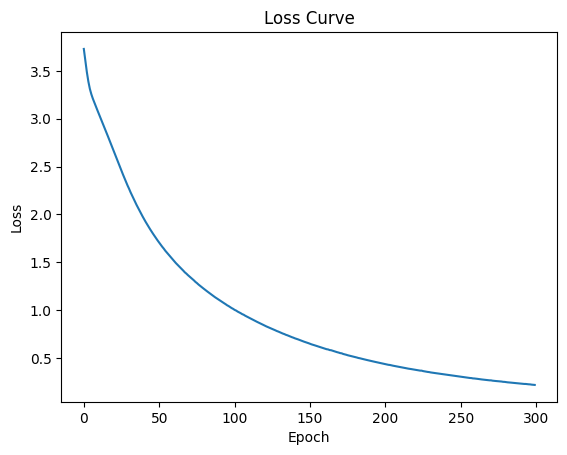

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.2, random_state=41)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
mlp = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
y_test_predict = mlp.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict))

Training set score: 0.982474
Test set score: 0.835391
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.76      0.70      0.73        23
           2       0.79      0.83      0.81        18
           3       0.83      0.62      0.71         8
           4       0.79      0.92      0.85        12
           5       0.54      1.00      0.70         7
           6       0.50      1.00      0.67         3
           7       1.00      0.80      0.89         5
           8       0.83      0.83      0.83        12
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        15
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       0.75      0.60      0.67         5
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

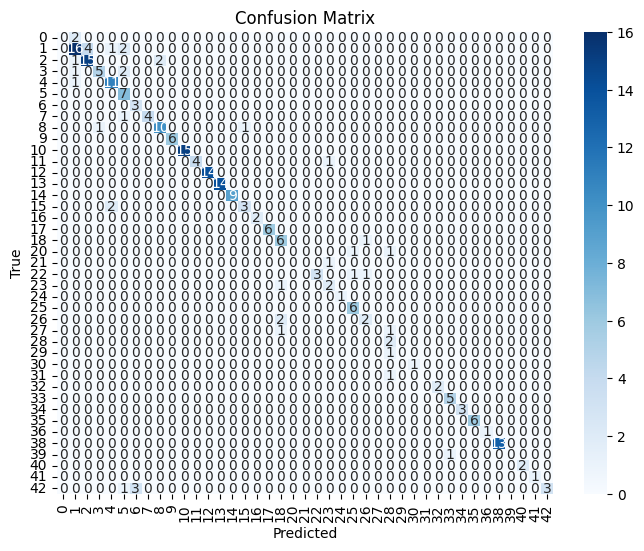

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
# YOUR CODE HERE
parameters = {
    'hidden_layer_sizes': [(100), (200), (200, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    'random_state': [42]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
mlp = MLPClassifier(max_iter=300)
cv = StratifiedKFold(n_splits=3)
random_search = RandomizedSearchCV(mlp, parameters, random_state=42, cv=cv, n_iter=10,verbose=3)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=adaptive, random_state=42, solver=adam;, score=0.836 total time=  57.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=adaptive, random_state=42, solver=adam;, score=0.817 total time=  30.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=adaptive, random_state=42, solver=adam;, score=0.851 total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=200, learning_rate=constant, random_state=42, solver=sgd;, score=0.130 total time=  49.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=200, learning_rate=constant, random_state=42, solver=sgd;, score=0.167 total time=  51.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=200, learning_rate=constant, random_state=42, solver=sgd;, score=0.124 total time=  47.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=adaptive, random_state=42, solver=sgd;, score=0.127 total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=adaptive, random_state=42, solver=sgd;, score=0.127 total time=  31.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=adaptive, random_state=42, solver=sgd;, score=0.124 total time=  28.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=200, learning_rate=adaptive, random_state=42, solver=adam;, score=0.830 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=200, learning_rate=adaptive, random_state=42, solver=adam;, score=0.811 total time=  57.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=200, learning_rate=adaptive, random_state=42, solver=adam;, score=0.842 total time=  55.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=sgd;, score=0.127 total time=  29.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=sgd;, score=0.127 total time=  30.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=sgd;, score=0.124 total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=adam;, score=0.812 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=adam;, score=0.805 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.05, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=adam;, score=0.839 total time=  35.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.05, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=sgd;, score=0.108 total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.05, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=sgd;, score=0.133 total time=  25.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.05, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=sgd;, score=0.130 total time=  27.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.05, hidden_layer_sizes=200, learning_rate=adaptive, random_state=42, solver=adam;, score=0.790 total time=  53.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.05, hidden_layer_sizes=200, learning_rate=adaptive, random_state=42, solver=adam;, score=0.793 total time=  50.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.05, hidden_layer_sizes=200, learning_rate=adaptive, random_state=42, solver=adam;, score=0.830 total time=  55.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=200, learning_rate=constant, random_state=42, solver=sgd;, score=0.105 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=200, learning_rate=constant, random_state=42, solver=sgd;, score=0.093 total time=  44.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=200, learning_rate=constant, random_state=42, solver=sgd;, score=0.080 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=adam;, score=0.836 total time=  40.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=adam;, score=0.817 total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[CV 3/3] END activation=tanh, alpha=0.0001, hidden_layer_sizes=100, learning_rate=constant, random_state=42, solver=adam;, score=0.851 total time=  37.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=MLPClassifier(max_iter=300),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [100, 200,
                                                               (200, 50)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'random_state': [42],
                                        'solver': ['sgd', 'adam']},
                   random_state=42, verbose=3)

In [ ]:
best_params = random_search.best_params_
print(best_params)
best_score = random_search.best_score_
print(best_score)
best_estimator = random_search.best_estimator_
print(best_estimator)

{'solver': 'adam', 'random_state': 42, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.0001, 'activation': 'tanh'}
0.8350501344137395
MLPClassifier(activation='tanh', hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=300, random_state=42)


In [ ]:
print("Training set score: %f" % best_estimator.score(X_train, y_train))
print("Test set score: %f" % best_estimator.score(X_test, y_test))
y_test_predict_best = best_estimator.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_test_predict_best))

Training set score: 1.000000
Test set score: 0.860082
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.81      0.74      0.77        23
           2       0.78      0.78      0.78        18
           3       1.00      0.62      0.77         8
           4       0.92      1.00      0.96        12
           5       0.50      1.00      0.67         7
           6       0.75      1.00      0.86         3
           7       0.80      0.80      0.80         5
           8       0.86      1.00      0.92        12
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        15
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       0.75      0.60      0.67         5
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

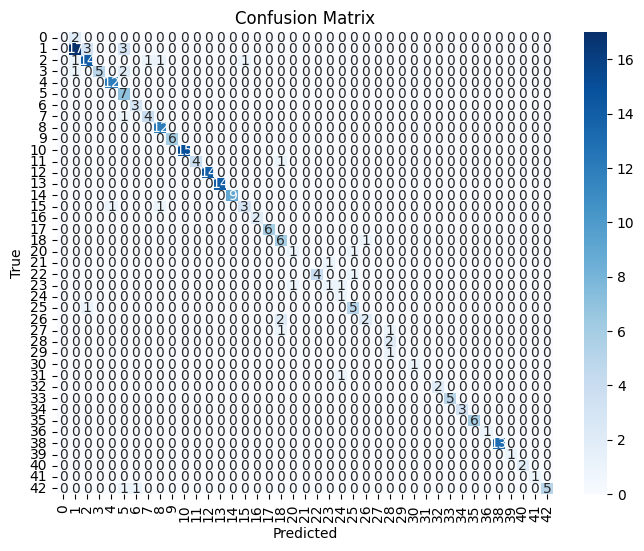

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_predict_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(min_samples_split=2,random_state=42)
DT_clf.fit(X_train, y_train)
DT_prediction = DT_clf.predict(X_test)
print("Training set accuracy score: %f" % DT_clf.score(X_train, y_train))
print("Test set accuracy score: %f" % DT_clf.score(X_test, y_test))
print('Classification Report: ')
print(metrics.classification_report(y_test, DT_prediction))

Training set accuracy score: 1.000000
Test set accuracy score: 0.559671
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.57      0.63        23
           2       0.75      0.67      0.71        18
           3       0.25      0.12      0.17         8
           4       0.40      0.33      0.36        12
           5       0.31      0.57      0.40         7
           6       0.22      0.67      0.33         3
           7       0.50      0.60      0.55         5
           8       0.45      0.83      0.59        12
           9       0.67      1.00      0.80         6
          10       0.85      0.73      0.79        15
          11       1.00      0.60      0.75         5
          12       0.80      0.86      0.83        14
          13       0.85      0.79      0.81        14
          14       1.00      0.67      0.80         9
          15       0.33      0.20      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train, y_train)
RF_prediction = RF_clf.predict(X_test)
print("Training set accuracy score: %f" % RF_clf.score(X_train, y_train))
print("Test set accuracy score: %f" % RF_clf.score(X_test, y_test))
print('Classification Report: ')
print(metrics.classification_report(y_test, RF_prediction))

Training set accuracy score: 1.000000
Test set accuracy score: 0.810700
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.87      0.85        23
           2       0.75      0.83      0.79        18
           3       1.00      0.38      0.55         8
           4       0.71      0.83      0.77        12
           5       0.50      0.86      0.63         7
           6       0.38      1.00      0.55         3
           7       1.00      0.80      0.89         5
           8       0.91      0.83      0.87        12
           9       1.00      1.00      1.00         6
          10       0.94      1.00      0.97        15
          11       0.80      0.80      0.80         5
          12       0.93      1.00      0.97        14
          13       0.93      1.00      0.97        14
          14       1.00      0.89      0.94         9
          15       1.00      0.60      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
SVM_clf = SVC(random_state=42)
SVM_clf.fit(X_train, y_train)
SVM_prediction = SVM_clf.predict(X_test)
print("Training set accuracy score: %f" % SVM_clf.score(X_train, y_train))
print("Test set accuracy score: %f" % SVM_clf.score(X_test, y_test))
print('Classification Report: ')
print(metrics.classification_report(y_test, SVM_prediction))

Training set accuracy score: 0.894845
Test set accuracy score: 0.679012
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.55      0.74      0.63        23
           2       0.48      0.67      0.56        18
           3       1.00      0.12      0.22         8
           4       0.43      0.50      0.46        12
           5       0.45      0.71      0.56         7
           6       0.30      1.00      0.46         3
           7       1.00      0.80      0.89         5
           8       0.64      0.75      0.69        12
           9       1.00      0.83      0.91         6
          10       1.00      0.87      0.93        15
          11       1.00      0.80      0.89         5
          12       0.93      1.00      0.97        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       1.00      0.20      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)
KNN_prediction = KNN_clf.predict(X_test)
print("Training set accuracy score: %f" % KNN_clf.score(X_train, y_train))
print("Test set accuracy score: %f" % KNN_clf.score(X_test, y_test))
print('Classification Report: ')
print(metrics.classification_report(y_test, KNN_prediction))

Training set accuracy score: 0.736082
Test set accuracy score: 0.534979
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.34      0.52      0.41        23
           2       0.24      0.39      0.30        18
           3       0.00      0.00      0.00         8
           4       0.40      0.33      0.36        12
           5       0.21      0.57      0.31         7
           6       0.30      1.00      0.46         3
           7       0.75      0.60      0.67         5
           8       0.57      0.33      0.42        12
           9       0.75      0.50      0.60         6
          10       0.87      0.87      0.87        15
          11       0.40      0.40      0.40         5
          12       0.93      1.00      0.97        14
          13       1.00      1.00      1.00        14
          14       1.00      0.56      0.71         9
          15       1.00      0.40      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((970, 2700), (243, 2700), (970,), (243,))

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE
nn_model = Sequential([
    Dense(300, activation='relu', input_shape=X_train.shape[1:]),
    Dense(150, activation='relu'),
    Dense(43, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 300)                 │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 43)                  │           6,493 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 861,943 (3.29 MB)

 Trainable params: 861,943 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip -qq install livelossplot

In [ ]:
import livelossplot

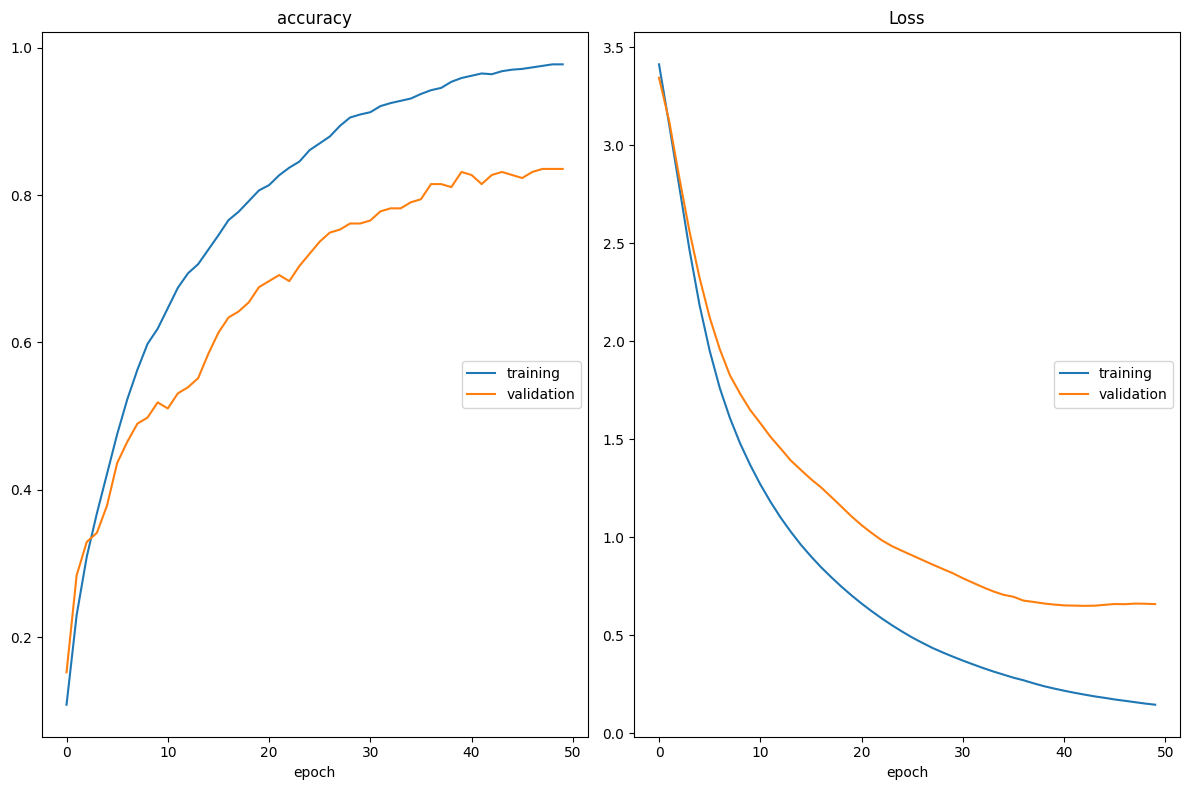

accuracy
	training         	 (min:    0.108, max:    0.977, cur:    0.977)
	validation       	 (min:    0.152, max:    0.835, cur:    0.835)
Loss
	training         	 (min:    0.146, max:    3.412, cur:    0.146)
	validation       	 (min:    0.650, max:    3.343, cur:    0.659)
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9761 - loss: 0.1443 - val_accuracy: 0.8354 - val_loss: 0.6589


In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
plot_losses = livelossplot.PlotLossesKeras()
nn_model.fit(X_train, y_train, epochs=50, callbacks=[plot_losses], validation_data=(X_test, y_test))

In [ ]:
score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])
y_test_predict_nn = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_test_predict_nn, axis=1)
print(classification_report(y_test, y_pred_nn))

Test accuracy: 0.8353909254074097
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.78      0.91      0.84        23
           2       1.00      0.50      0.67        18
           3       0.83      0.62      0.71         8
           4       0.67      1.00      0.80        12
           5       0.50      1.00      0.67         7
           6       1.00      1.00      1.00         3
           7       0.80      0.80      0.80         5
           8       1.00      0.75      0.86        12
           9       1.00      1.00      1.00         6
          10       0.94      1.00      0.97        15
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       1.00      0.60      0.75         5
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'Confusion Matrix')

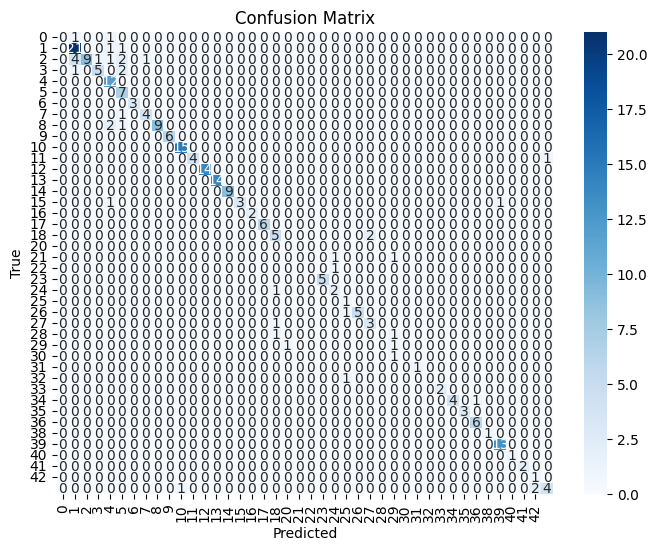

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# YOUR CODE HERE
tf.random.set_seed(42)
model_1 = Sequential([
    Dense(100, activation='relu', input_shape=X_train.shape[1:]),
    Dense(43, activation='softmax')
])
model_1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 100)                 │         270,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 43)                  │           4,343 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,443 (1.05 MB)

 Trainable params: 274,443 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

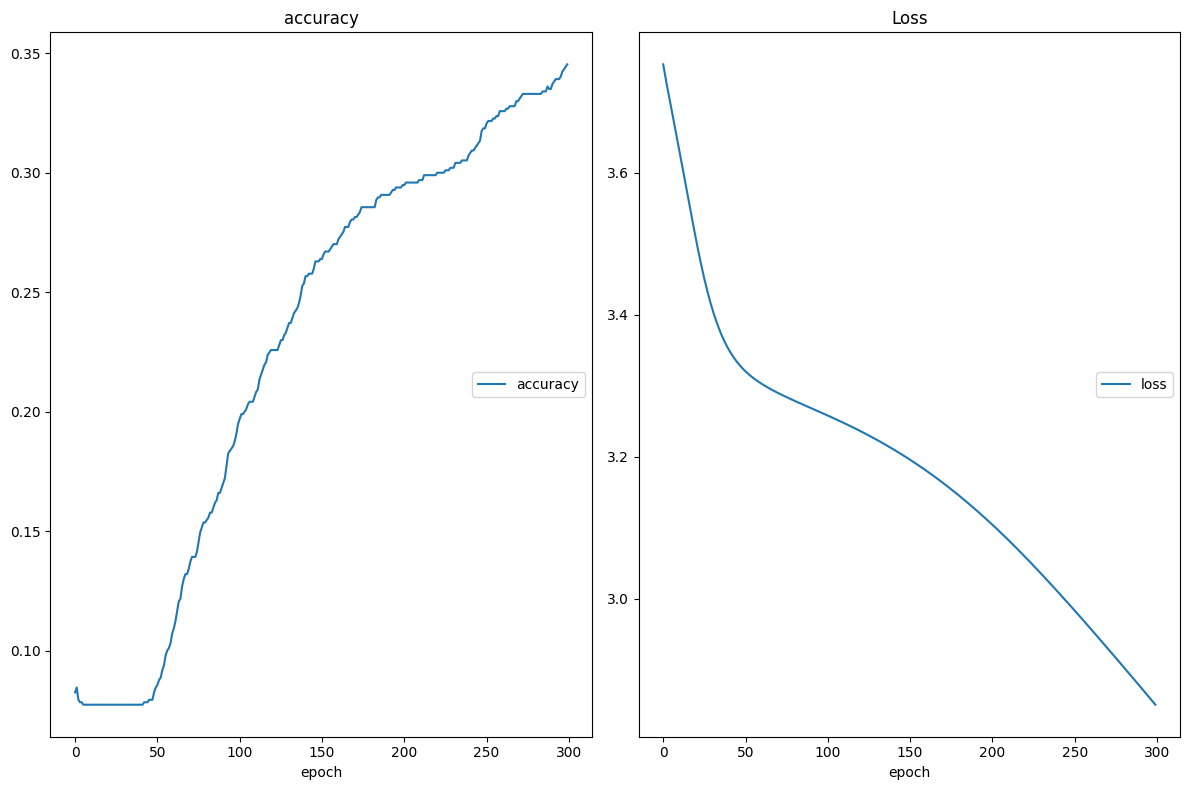

accuracy
	accuracy         	 (min:    0.077, max:    0.345, cur:    0.345)
Loss
	loss             	 (min:    2.850, max:    3.753, cur:    2.850)
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3589 - loss: 2.8335


In [ ]:
plot_losses = livelossplot.PlotLossesKeras()
model_1.fit(X_train, y_train, epochs=300, callbacks=[plot_losses])

In [ ]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])
y_test_predict_model_1 = model_1.predict(X_test)
y_test_predict_model_1 = np.argmax(y_test_predict_model_1, axis=1)
print(classification_report(y_test, y_test_predict_model_1))

Test accuracy: 0.2921810746192932
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.17      0.22        23
           2       0.24      0.78      0.36        18
           3       0.00      0.00      0.00         8
           4       0.33      0.08      0.13        12
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         6
          10       0.50      0.87      0.63        15
          11       0.00      0.00      0.00         5
          12       0.23      0.86      0.36        14
          13       0.27      1.00      0.42        14
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         5
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

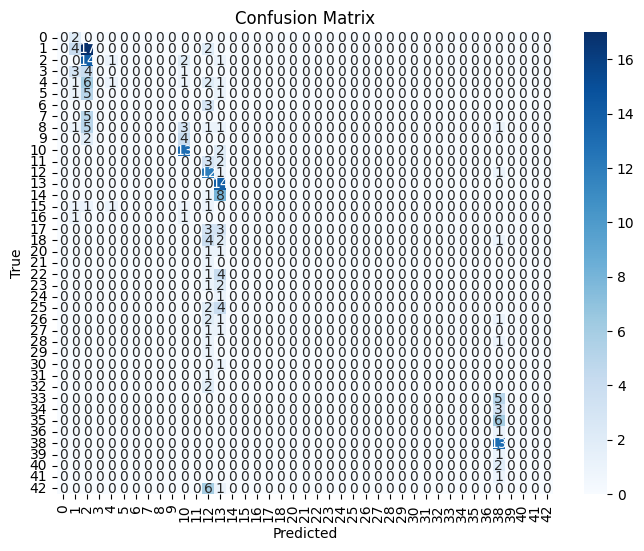

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_predict_model_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
# Regularization

nn_model_1 = Sequential([
    Dense(300, activation='relu', input_shape=X_train.shape[1:], kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.001)),
    Dense(150, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.001)),
    Dense(43, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model_1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 300)                 │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 43)                  │           6,493 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 861,943 (3.29 MB)

 Trainable params: 861,943 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

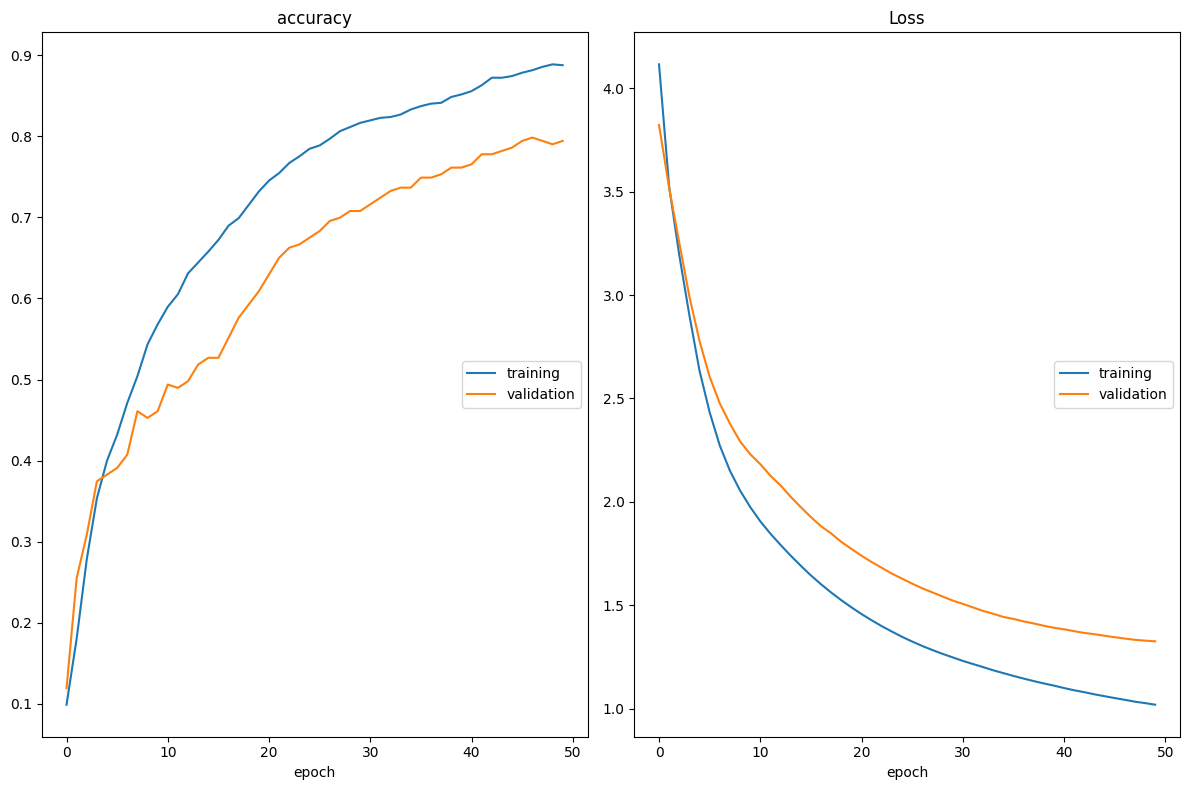

accuracy
	training         	 (min:    0.099, max:    0.889, cur:    0.888)
	validation       	 (min:    0.119, max:    0.798, cur:    0.794)
Loss
	training         	 (min:    1.020, max:    4.115, cur:    1.020)
	validation       	 (min:    1.326, max:    3.822, cur:    1.326)
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8861 - loss: 1.0280 - val_accuracy: 0.7942 - val_loss: 1.3261


In [ ]:
from keras.callbacks import EarlyStopping
plot_losses = livelossplot.PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
nn_model_1.fit(X_train, y_train, epochs=50, callbacks=[plot_losses, early_stop], validation_data=(X_test, y_test))

In [ ]:
score = nn_model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])
y_test_predict_nn_1 = nn_model_1.predict(X_test)
y_test_predict_nn_1 = np.argmax(y_test_predict_nn_1, axis=1)
print(classification_report(y_test, y_test_predict_nn_1))

Test accuracy: 0.7942386865615845
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.87      0.83        23
           2       0.91      0.56      0.69        18
           3       0.83      0.62      0.71         8
           4       0.69      0.92      0.79        12
           5       0.47      1.00      0.64         7
           6       1.00      1.00      1.00         3
           7       0.80      0.80      0.80         5
           8       0.65      0.92      0.76        12
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        15
          11       1.00      0.80      0.89         5
          12       0.92      0.86      0.89        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       1.00      0.60      0.75         5
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

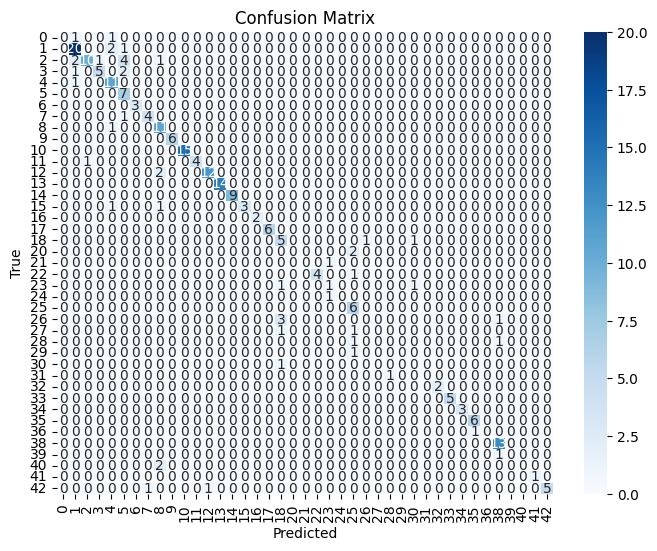

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_predict_nn_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
# Dropout

nn_model_2 = Sequential([
    Dense(300, activation='relu', input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_initializer="he_normal"),
    Dropout(0.2),
    Dense(43, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model_2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                     │ (None, 300)                 │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 43)                  │           6,493 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 861,943 (3.29 MB)

 Trainable params: 861,943 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

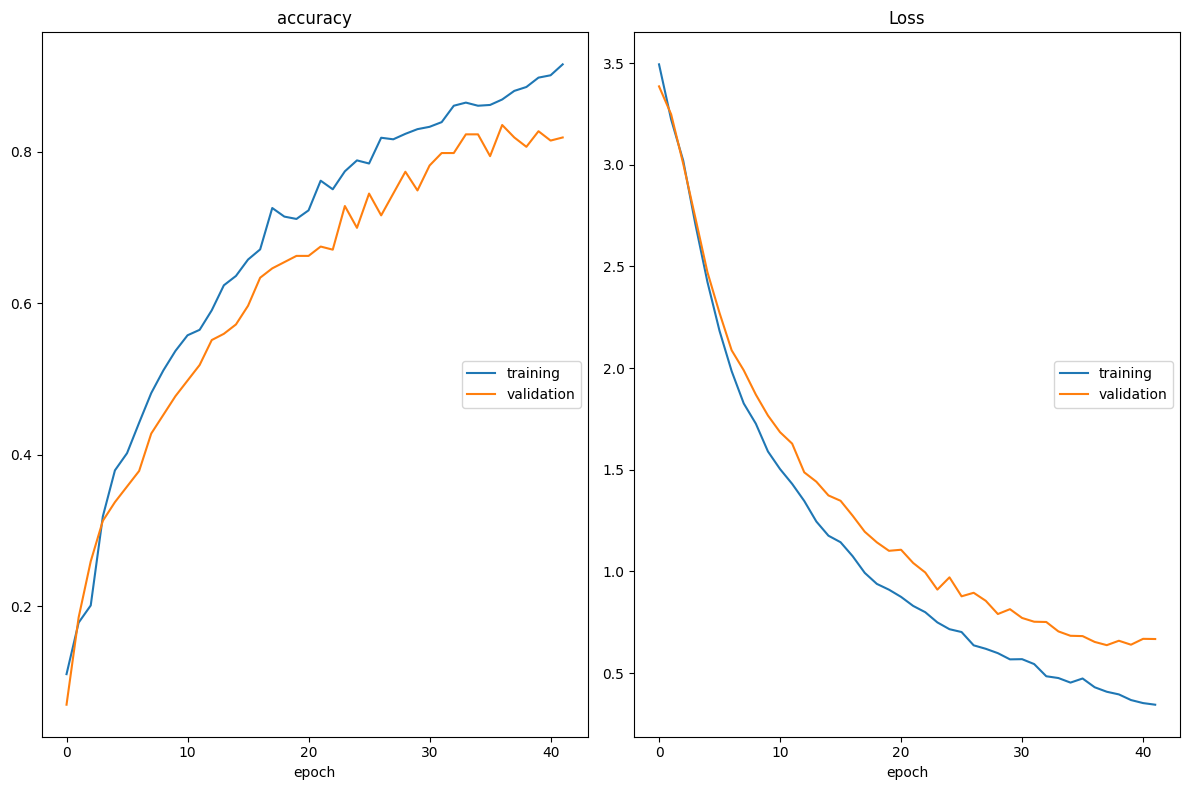

accuracy
	training         	 (min:    0.110, max:    0.915, cur:    0.915)
	validation       	 (min:    0.070, max:    0.835, cur:    0.819)
Loss
	training         	 (min:    0.345, max:    3.493, cur:    0.345)
	validation       	 (min:    0.638, max:    3.385, cur:    0.668)
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9148 - loss: 0.3616 - val_accuracy: 0.8189 - val_loss: 0.6678
Epoch 42: early stopping


In [ ]:
plot_losses = livelossplot.PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
nn_model_2.fit(X_train, y_train, epochs=50, callbacks=[plot_losses, early_stop], validation_data=(X_test, y_test))

In [ ]:
score = nn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])
y_test_predict_nn_2 = nn_model_2.predict(X_test)
y_test_predict_nn_2 = np.argmax(y_test_predict_nn_2, axis=1)
print(classification_report(y_test, y_test_predict_nn_2))

Test accuracy: 0.8189300298690796
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.87      0.83        23
           2       1.00      0.50      0.67        18
           3       1.00      0.38      0.55         8
           4       0.73      0.92      0.81        12
           5       0.39      1.00      0.56         7
           6       1.00      1.00      1.00         3
           7       0.80      0.80      0.80         5
           8       0.69      0.92      0.79        12
           9       1.00      0.83      0.91         6
          10       0.94      1.00      0.97        15
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       1.00      0.60      0.75         5
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix')

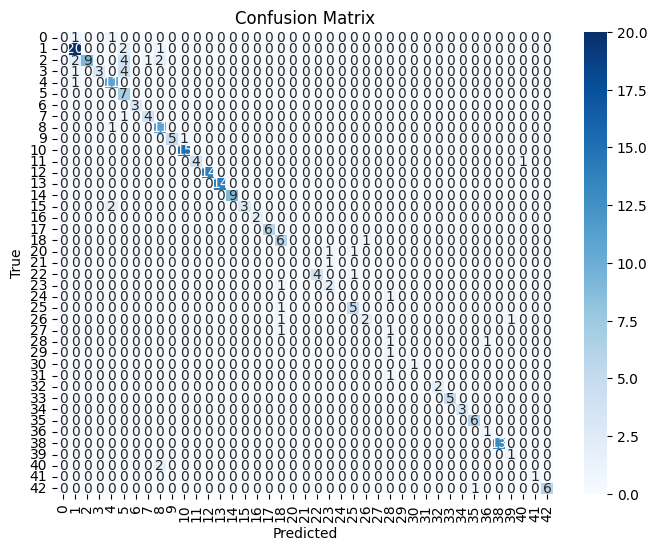

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_predict_nn_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
# Batch Normalization

nn_model_3 = Sequential([
    Dense(300, activation='relu', input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(150, activation='relu', kernel_initializer="he_normal"),
    BatchNormalization(),
    Dense(43, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model_3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                     │ (None, 300)                 │         810,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 43)                  │           6,493 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 863,743 (3.29 MB)

 Trainable params: 862,843 (3.29 MB)

 Non-trainable params: 900 (3.52 KB)

In [ ]:
nn_model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

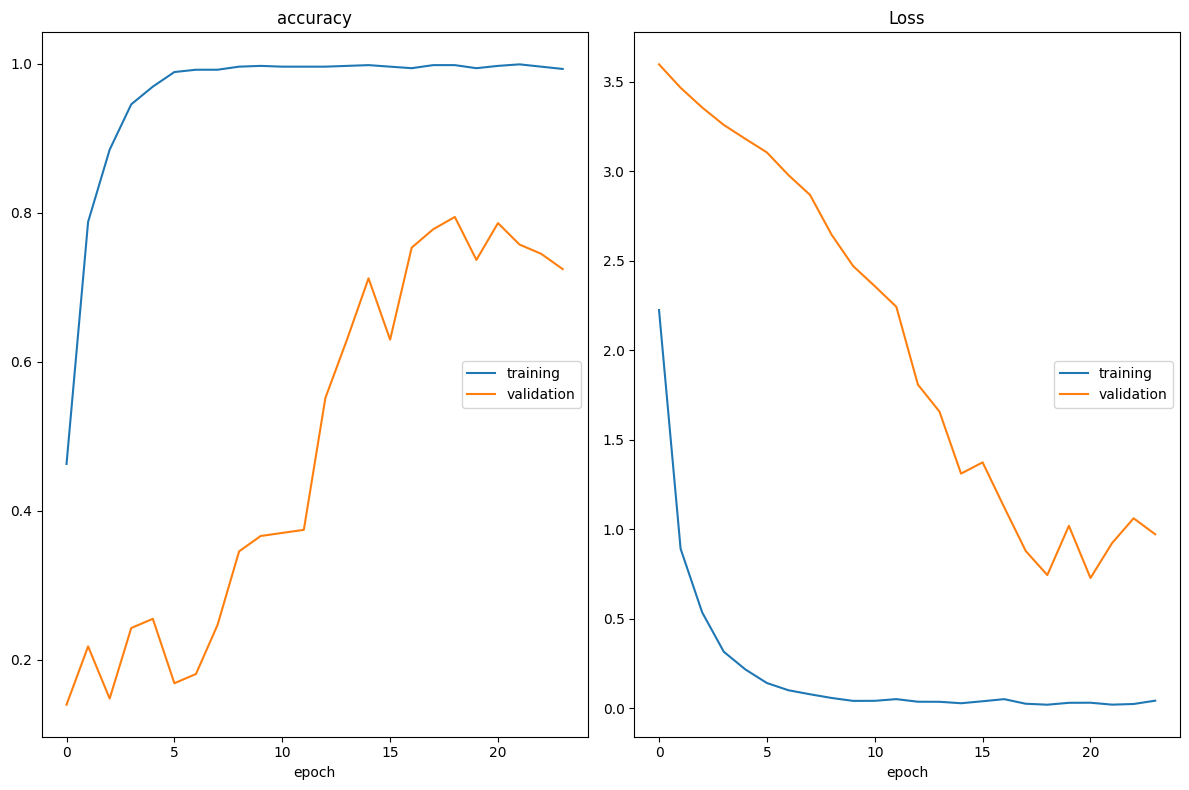

accuracy
	training         	 (min:    0.463, max:    0.999, cur:    0.993)
	validation       	 (min:    0.140, max:    0.794, cur:    0.724)
Loss
	training         	 (min:    0.019, max:    2.225, cur:    0.041)
	validation       	 (min:    0.727, max:    3.598, cur:    0.971)
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9885 - loss: 0.0458 - val_accuracy: 0.7243 - val_loss: 0.9713
Epoch 24: early stopping


In [ ]:
plot_losses = livelossplot.PlotLossesKeras()
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
nn_model_3.fit(X_train, y_train, epochs=50, callbacks=[plot_losses, early_stop], validation_data=(X_test, y_test))

In [ ]:
score = nn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])
y_test_predict_nn_3 = nn_model_3.predict(X_test)
y_test_predict_nn_3 = np.argmax(y_test_predict_nn_3, axis=1)
print(classification_report(y_test, y_test_predict_nn_3))

Test accuracy: 0.7242798209190369
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.76      0.57      0.65        23
           2       0.38      1.00      0.55        18
           3       0.67      0.25      0.36         8
           4       0.82      0.75      0.78        12
           5       0.50      0.14      0.22         7
           6       0.50      0.33      0.40         3
           7       1.00      0.80      0.89         5
           8       1.00      0.75      0.86        12
           9       1.00      0.83      0.91         6
          10       0.88      1.00      0.94        15
          11       0.75      0.60      0.67         5
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       1.00      0.80      0.89         5
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'Confusion Matrix')

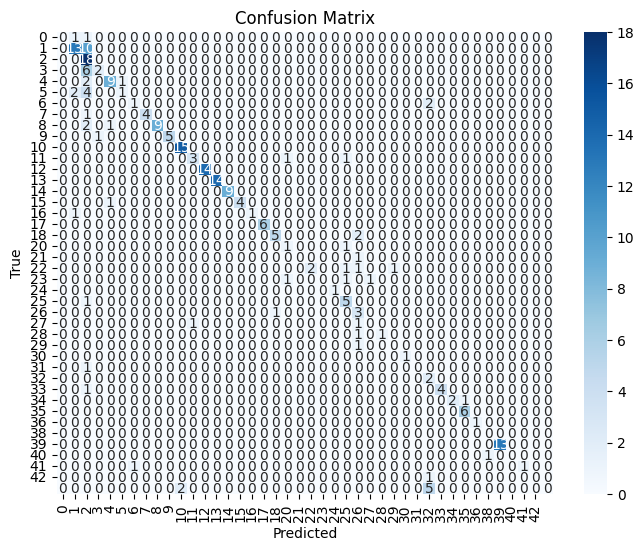

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_predict_nn_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.